# Abstract

For the time being I have mainly used CTR to explore data. I will try to use other evalution metrics too later

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(2430981, 25)

In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(11), object(14)
memory usage: 463.7+ MB


In [6]:
train.head(20)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,trqRTuxoGQdcFNKbuKz,bdbc836b2f86c0391bd2f1e1e50739b3,null,mm_10024662_3445902_11178345,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,3FKElpuEMusyJqKbuKz,6957deb8d83340086ef3cb2abd9c7198,null,Fashion_F_Width1,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,trqRTvp8gIc7gspy,4c70d1fc007d5349286f58da6d08fa9,null,mm_33208362_3404787_11119183,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,ersbQv1RdoTy1m58uG,cbec43b96a01da4a0e06cc78d483a24f,null,ALLINONE_F_Width1,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,ersbQv1RdoTy1m58uG,1b2f87d6f3b8b473afe7e9fbe597afca,null,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


### Null values

In [7]:
obj_cols = list(train.select_dtypes(include=['object']).columns)
nulls_list = [train[col].str.match("null").sum()/train.shape[0] for col in obj_cols]
nulls_df = pd.DataFrame(index = obj_cols, data = nulls_list)
nulls_df

,0
bidid,0.000000
userid,0.000000
useragent,0.000000
IP,0.000000
adexchange,0.020497
domain,0.056411
url,0.035711
urlid,1.000000
slotid,0.000000
slotvisibility,0.000000


## New features

In [8]:
train["os"] = train["useragent"].map(lambda x: x.split("_")[0])
train["browser"] = train["useragent"].map(lambda x: x.split("_")[1])
train["slotarea"] = train["slotwidth"]*train["slotheight"].astype("category")

# Aggregated Statistics

I am not sure if it is meaningful to explore aggregated statistics, since different advertisers seem to present quite different behaviors. However, we will take a look in case we find some interesting patterns.

In [9]:
def Aggregated_CTR(df, by = "weekday"):
    
    feat = df[by].unique()
    res = pd.DataFrame(columns = [by, "CTR"])
    i = 0
    
    for f in feat:
        
        df_ = df.loc[df[by] == f]
        
        # Number of impressions
        impr = df_.shape[0]

        # Number of clicks
        clicks = df_["click"].sum()

        # CTR
        ctr = clicks*100/impr
        
        # Store results to dataframe
        res.loc[i] = [f, ctr]
        i+=1
        
    return res

### Weekday

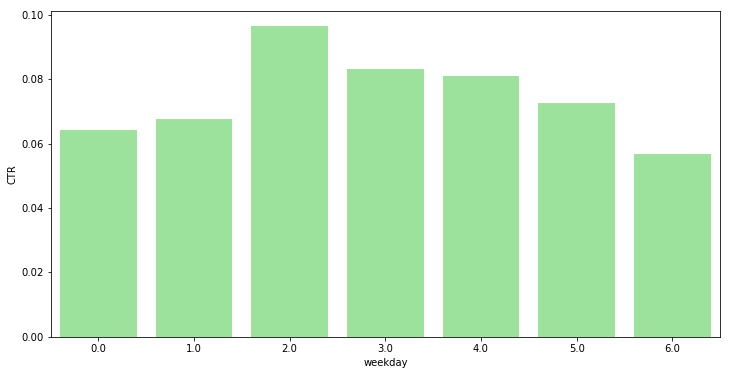

In [10]:
plt.figure(figsize = (12,6))
sns.barplot(x = "weekday", y = "CTR", data = Aggregated_CTR(train, "weekday"), color = "lightgreen")

### Hour

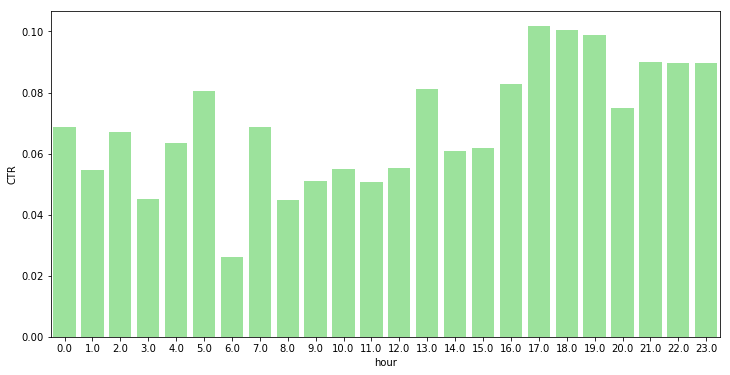

In [11]:
plt.figure(figsize = (12,6))
sns.barplot(x = "hour", y = "CTR", data = Aggregated_CTR(train, "hour"), color = "lightgreen")

### OS

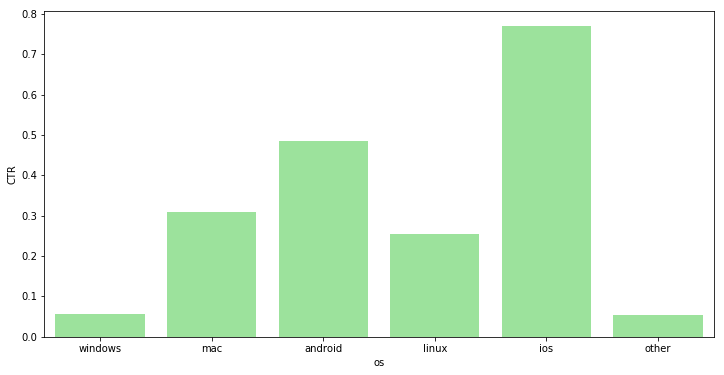

In [12]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y = "CTR", data = Aggregated_CTR(train, "os"), color = "lightgreen")

### Browser

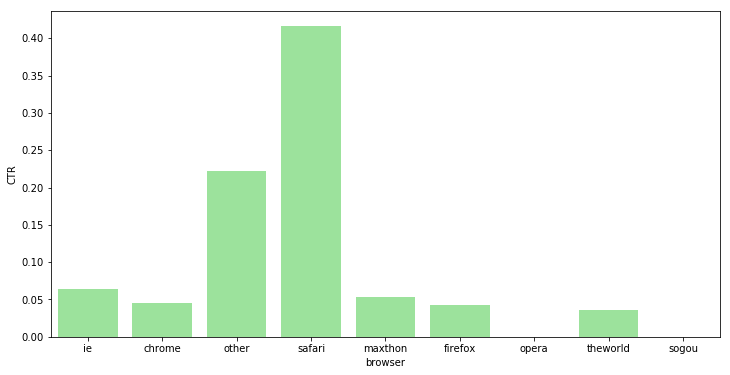

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y = "CTR", data = Aggregated_CTR(train, "browser"), color = "lightgreen")

### Slotarea

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

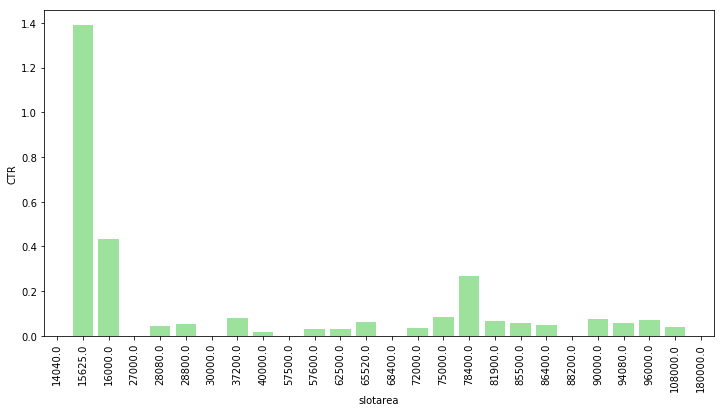

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotarea", y = "CTR", data = Aggregated_CTR(train, "slotarea"), color = "lightgreen")
plt.xticks(rotation = 90)

### Slotvisibility

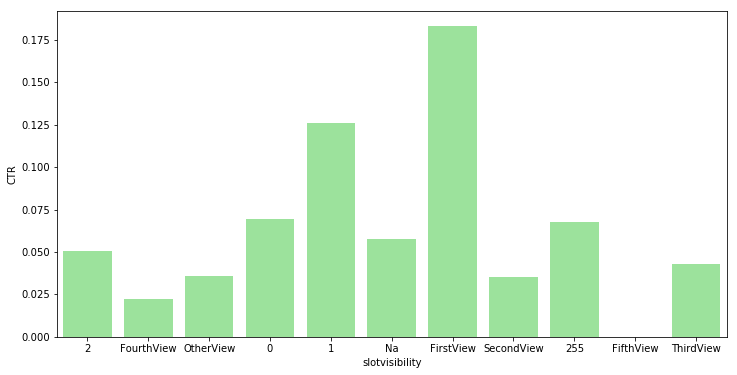

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotvisibility", y = "CTR", data = Aggregated_CTR(train, "slotvisibility"), color = "lightgreen")

### Bidprice VS Payprice

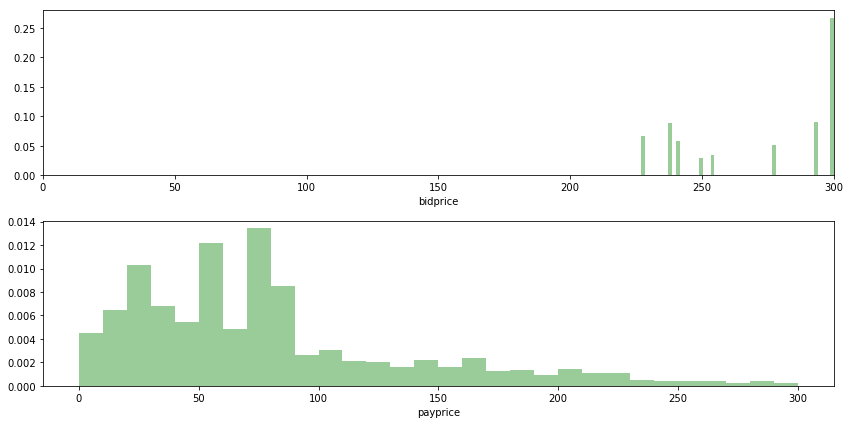

In [16]:
plt.figure(figsize = (12,6))

ax = plt.subplot(2,1,1)
sns.distplot(train["bidprice"], kde = False, norm_hist = True, color = "green")
ax.set_xlim([0,300])

ax = plt.subplot(2,1,2)
sns.distplot(train["payprice"], bins = 30, kde = False, norm_hist = True, color = "green")

plt.tight_layout()

# Statistics per Advertiser

In [17]:
train["advertiser"].value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [18]:
advert = train["advertiser"].unique()
advert

array([3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997], dtype=int64)

## Summary Statistics

In [19]:
df = pd.DataFrame(columns = ["Advertiser", "Impressions", "Clicks", "Bids", "Cost", "CTR", "eCPC", "CPM"])

In [20]:
cny_currency = 0.15765
i=0

for adv in advert:
    
    # Impressions
    imp = train.loc[ train["advertiser"] == adv ].shape[0]
    
    # Clicks
    clicks = train.loc[ train["advertiser"] == adv ]["click"].sum()
    
    # Bids
    bids = train.loc[ train["advertiser"] == adv ]["bidprice"].sum()
    
    # Paid
    cost = train.loc[ train["advertiser"] == adv ]["payprice"].sum()
    
    # CTR
    ctr = clicks*100/imp
    
    # eCPC
    e_cpc = cost/clicks
    
    # CPM
    cpm = cost*1000/imp
    
    # Store results
    df.loc[i] = [adv, imp, clicks, bids, cost, ctr, e_cpc, cpm]
    i+=1

In [21]:
df

,Advertiser,Impressions,Clicks,Bids,Cost,CTR,eCPC,CPM
0,3427.0,402806.0,272.0,95218860.0,30458711.0,0.067526,111980.555147,75616.328952
1,2821.0,211366.0,131.0,61343675.0,18828044.0,0.061978,143725.526718,89077.921709
2,1458.0,492353.0,385.0,147705900.0,33968736.0,0.078196,88230.483117,68992.645521
3,2259.0,133673.0,43.0,38508376.0,12428238.0,0.032168,289028.790698,92974.931362
4,3386.0,455041.0,320.0,136512300.0,34931823.0,0.070323,109161.946875,76766.319958
5,3358.0,264956.0,202.0,61729738.0,22447231.0,0.076239,111124.905941,84720.598892
6,3476.0,310835.0,187.0,77042367.0,23918779.0,0.060161,127907.909091,76950.082841
7,2261.0,110122.0,36.0,31701699.0,9873779.0,0.032691,274271.638889,89662.183760
8,2997.0,49829.0,217.0,13802633.0,3129267.0,0.435489,14420.585253,62800.116398


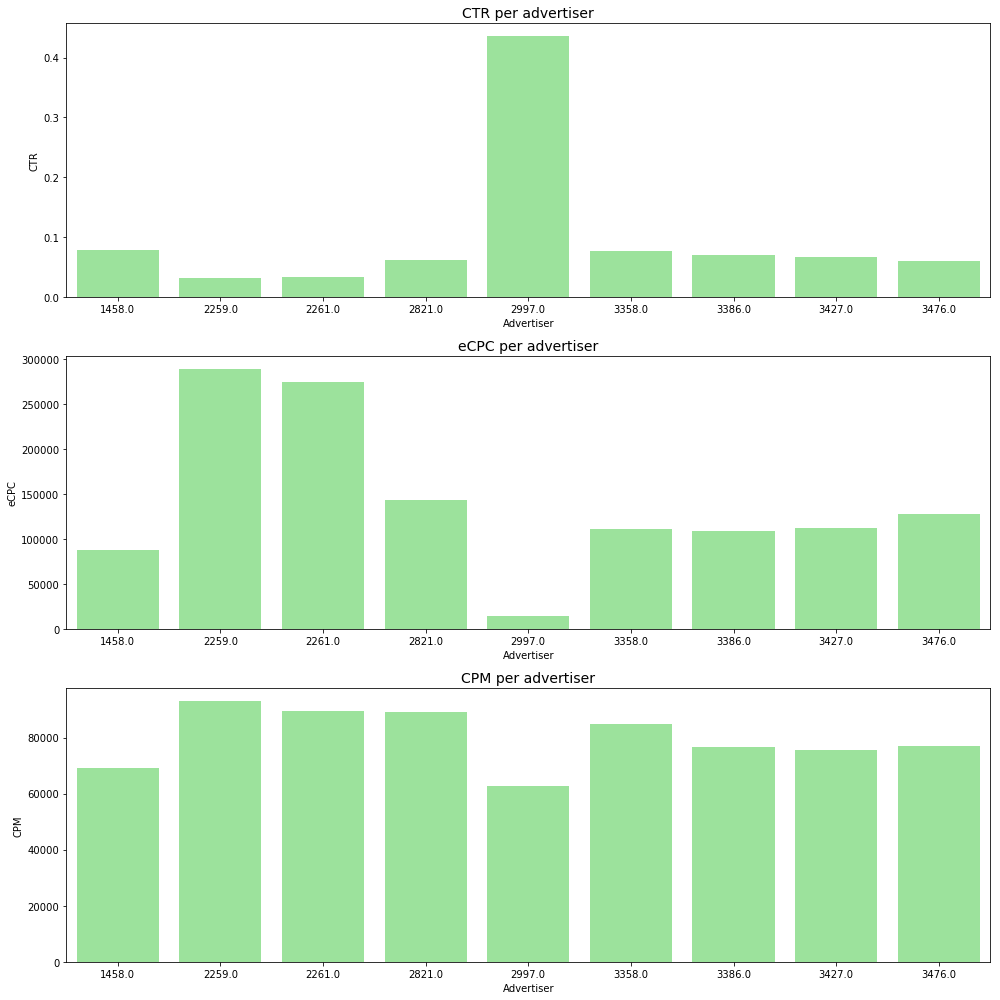

In [22]:
plt.figure(figsize = (14,14))

plt.subplot(3,1,1)
sns.barplot(x = "Advertiser", y = "CTR", data = df, color = "lightgreen")
plt.title("CTR per advertiser", fontsize = 14)

plt.subplot(3,1,2)
sns.barplot(x = "Advertiser", y = "eCPC", data = df, color = "lightgreen")
plt.title("eCPC per advertiser", fontsize = 14)

plt.subplot(3,1,3)
sns.barplot(x = "Advertiser", y = "CPM", data = df, color = "lightgreen")
plt.title("CPM per advertiser", fontsize = 14)

plt.tight_layout()

In [23]:
def CTR(df, advert = [3427], by = "weekday"):
    
    # Advertisers
    #advert = df["advertiser"].unique()
    
    # Unique features
    feat = df[by].unique()
    
    # Create dataframe
    res = pd.DataFrame(columns = ["Advertiser", by, "CTR"])
    i = 0
    
    for adv in advert:
        
        for f in feat:
            
            df_ = df.loc[ (df["advertiser"] == adv) & (df[by] == f)]
        
            # Number of impressions
            impr = df_.shape[0]
    
            # Number of clicks
            clicks = df_["click"].sum()
    
            # CTR
            try:
                ctr = clicks*100/impr
            except ZeroDivisionError:
                ctr = 0
            
            res.loc[i] = [adv, f, ctr]
            i+=1
        
    
    return res

### Weekday

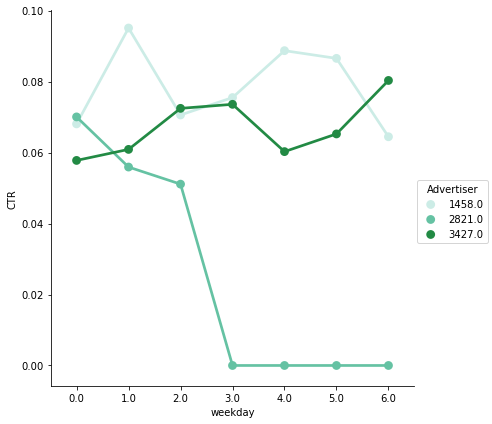

In [24]:
plt.figure(figsize = (24,6))
sns.factorplot(x = "weekday", y = "CTR", hue = "Advertiser", 
               data = CTR(train, advert[:3], by = "weekday"), 
               size = 6, 
               palette="BuGn")

### Hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

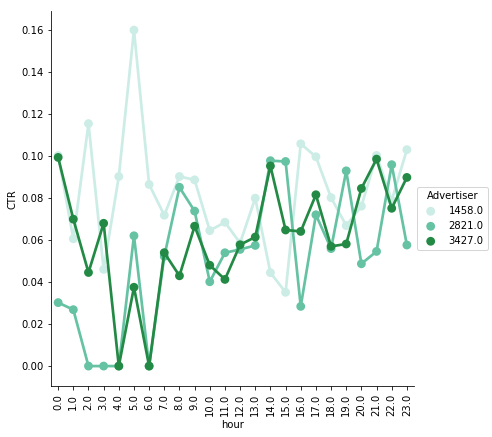

In [25]:
plt.figure(figsize = (24,6))
sns.factorplot(x = "hour", y = "CTR", hue = "Advertiser", 
               data = CTR(train, advert[:3], by = "hour"), 
               size = 6,
               palette="BuGn")
plt.xticks(rotation = 90)

### OS

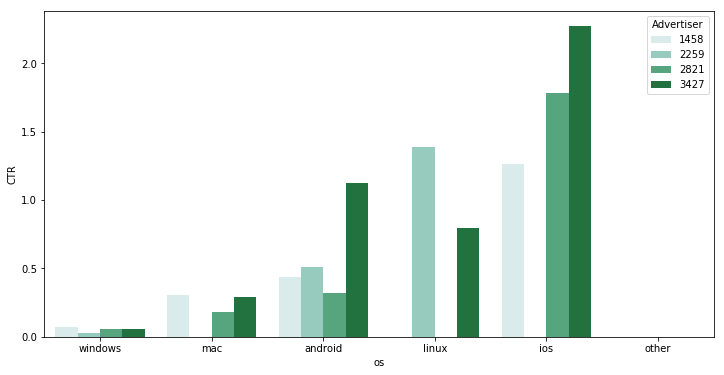

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "os"),
            palette="BuGn")

### Browser

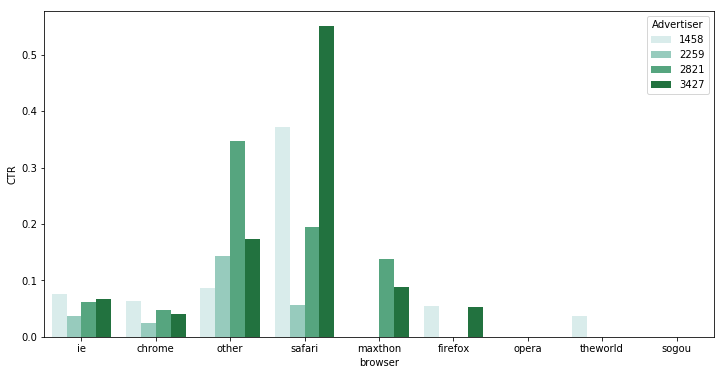

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "browser"), 
            palette="BuGn")

### Region

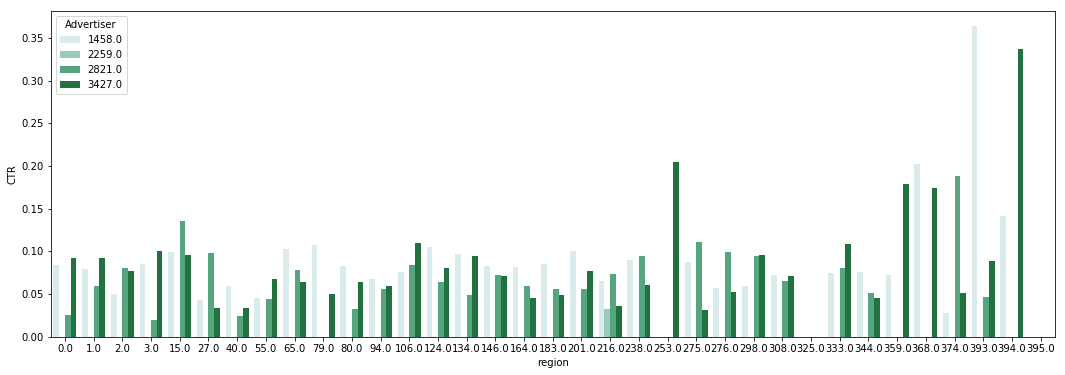

In [28]:
plt.figure(figsize = (18,6))
sns.barplot(x = "region", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "region"),
            palette="BuGn")

### Slot Area

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

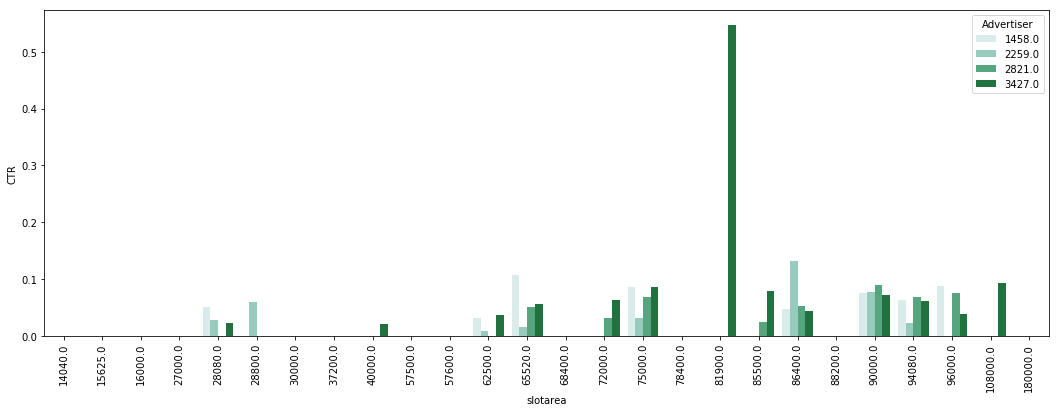

In [29]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotarea", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "slotarea"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Slot Visibility

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

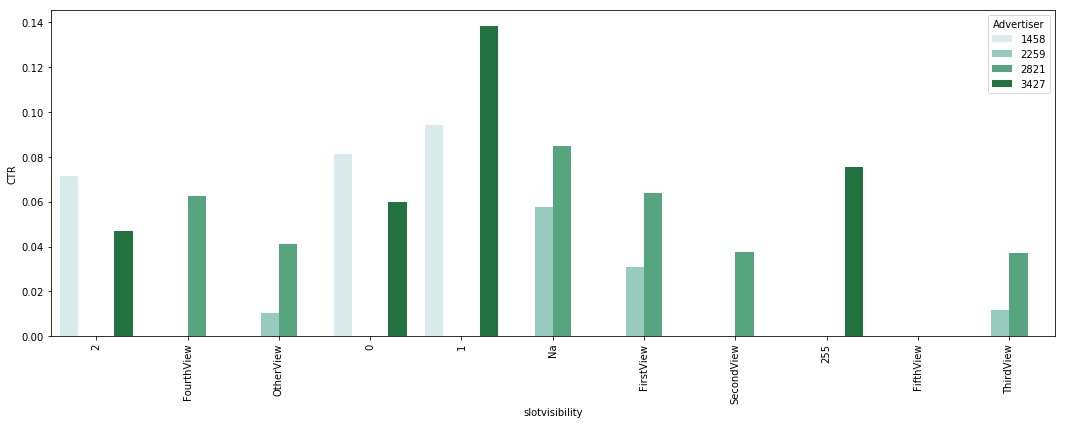

In [30]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotvisibility", y="CTR", hue = "Advertiser",
            data = CTR(train, advert[:4], by = "slotvisibility"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Ad-exchange

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

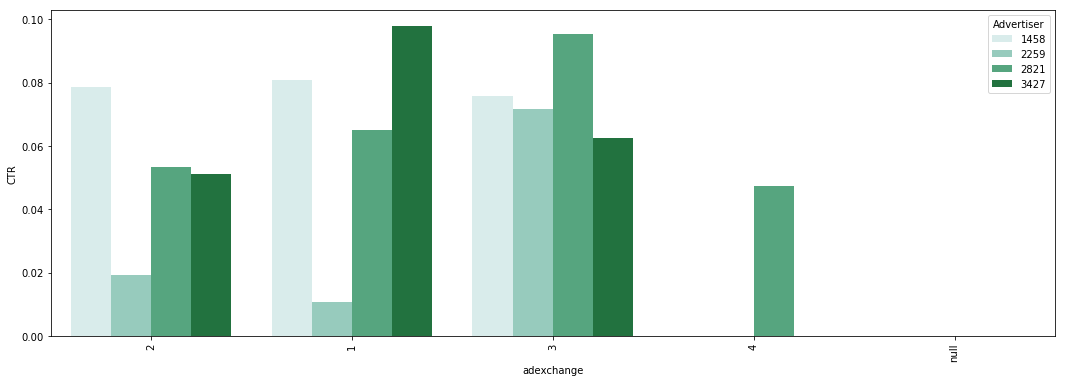

In [31]:
plt.figure(figsize = (18,6))
sns.barplot(x = "adexchange", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "adexchange"),
            palette="BuGn")
plt.xticks(rotation = 90)

In [32]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser', 'slotarea'],
      dtype='object')

mean price per weekday, payprice, bidprice histograms, tags!!!!!!!!

In [33]:
# def CreateDataframe(df, by):
    
#     adv = df["advertiser"].unique()
#     feat = sorted(df[by].unique())
    
#     cols = ["Advertiser", by, "CTR"]
#     adv_list = []
    
#     for i in range(len(adv)):
#         adv_list.append(np.repeat(adv[i], len(feat)))
        
#     adv_list = np.concatenate(adv_list)
    
#     feat_list = np.repeat(feat, len(adv))
    
#     ctr = pd.DataFrame(columns = cols)
#     ctr["Advertiser"] = adv_list
#     ctr[by] = feat_list
        
#     return ctr

In [34]:
77754/280

277.6928571428571